# Redes Neurais Artificiais - Projeto Prático 2.1
## Aprendizado Supervisionado do Neurônio Perceptron



Importação das bibliotecas basicas.


In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

Calculando o identificador de exemplos

In [3]:
matriculas = [
    1815080004, # Eduardo
    2315310019, # Oziel
    2315310020 # Pedro
]
identificador = sum([matricula % 10 for matricula in matriculas]) % 4
identificador

1

### Parte 1 - Resolvendo um Problema Linearmente Separável

Lendo dados de entrada

In [4]:
dados = np.fromfile('dataAll.txt', dtype=float)
dados = dados.reshape((-1, 3)) # Ler dados de entrada em forma de matriz de 3 colunas
dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [5]:
dados.shape

(1000, 3)

Gerando os pesos inciais

In [6]:
pesos = np.random.uniform(-0.5, 0.5, 2) # Gerando pesos uniformemente
pesos

array([0.19954154, 0.36509248])

Executando até convergência

In [30]:
def funcao_degrau(x):
    if x < 0: return 0
    return 1
def soma(x, peso):
    resultado = 0
    for i in range(len(x)):
        resultado += x[i] * peso[i]
    return resultado

n = 0.1 # Taxa de Aprendizado
erros = 1
print("Pesos Iniciais: ",pesos)
epoca = 0
total_ajustes = 0
while(erros != 0):
    erros = 0
    for i in range(len(dados)):
        x = dados[i][0:2]
        y = dados[i][2]
        y_prev = funcao_degrau(soma(x, pesos))
        erro = y - y_prev
        erros += abs(erro)
        if erro != 0:
            pesos += n * erro * x  # atualização vetorizada
            total_ajustes += 1
    print("Época %02d: Erros: %03d Pesos:"%(epoca, erros), pesos)
    epoca += 1
print("\nTotal de Ajustes de Pesos:",total_ajustes)
print("Quantidade de Épocas até Convergência:",epoca)


Pesos Iniciais:  [-0.03958639  0.00196689]
Época 00: Erros: 024 Pesos: [ 218.76295361 -217.73028311]
Época 01: Erros: 020 Pesos: [ 328.50069361 -254.32864311]
Época 02: Erros: 011 Pesos: [ 323.36944361 -323.50887311]
Época 03: Erros: 000 Pesos: [ 323.36944361 -323.50887311]

Total de Ajustes de Pesos: 55
Quantidade de Épocas até Convergência: 4


Desenhando o gráfico com os pontos e reta separadora

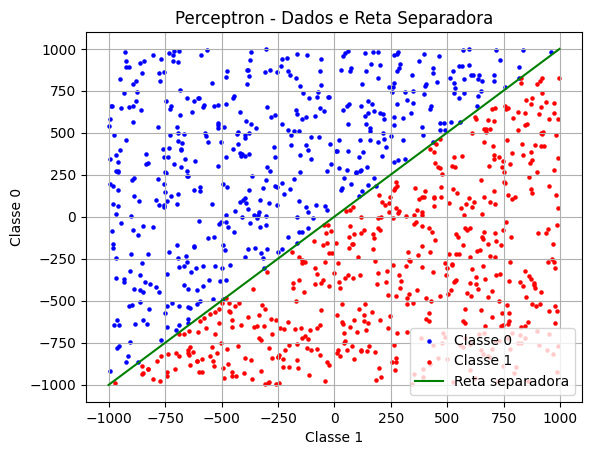

In [8]:
# Plotando os pontos no gráfico, 0 em azul e 1 em vermelho
for classe in [0, 1]:
    idx = dados[:, 2] == classe
    if classe == 0: cor, label = 'blue', 'Classe 0'
    else:           cor, label = 'red', 'Classe 1'
    plt.scatter(dados[idx, 0], dados[idx, 1], c=cor, label=label, s=5)

# Criar a reta separadora
x_vals = np.linspace(np.min(dados[:, 0])-1, np.max(dados[:, 0])+1, 200)
if pesos[1] != 0:
    y_vals = -(pesos[0] * x_vals) / pesos[1]
    plt.plot(x_vals, y_vals, 'green', label='Reta separadora')
else: # Reta é vertical
    x_vert = 0
    plt.axvline(x=x_vert, color='green', label='Reta separadora')

plt.xlabel('Classe 1')
plt.ylabel('Classe 0')
plt.title('Perceptron - Dados e Reta Separadora')
plt.legend()
plt.grid(True)
plt.show()

### Parte 2 - Experimentação

Importando Dados

In [25]:
# p2 = Parte 2
dados_p2 = np.fromfile('data1.txt', dtype=float)
dados_p2 = dados_p2.reshape((-1, 3)) # Ler dados de entrada em forma de matriz de 3 colunas
dados_p2

array([[ 0.13658687, -0.16460088,  0.        ],
       [-0.0228559 , -0.01094684,  0.        ],
       [-0.02654897,  0.00582183,  0.        ],
       ...,
       [ 0.99007304,  0.8921047 ,  1.        ],
       [ 0.91691441,  1.15684083,  1.        ],
       [ 0.99252852,  1.06937678,  1.        ]])

In [26]:
dados_p2.shape

(600, 3)

Definindo Configurações

In [27]:
n_p2 = [0.4, 0.1, 0.01]
intervalo = [(-100,+ 100),(-0.5,+ 0.5)]

Executando o Experimento

In [33]:
resultados = {} # Dicionário para armazenar todos os resultados

for n in n_p2:
  print("Taxa de Aprendizado: ", n)

  for inter in intervalo:
    print("Intervalo: ", inter)
    menor_num_epocas = float('inf') # Maior valor possível para depois comparar
    conj_total_ajustes = []

    for rep in range(10):
      print("Repetição: ", rep)
      pesos = np.random.uniform(inter[0], inter[1], 2)
      print("Pesos: ", pesos)
      erros = 1
      epoca = 0
      total_ajustes = 0

      while(erros != 0):
        erros = 0
        for i in range(len(dados_p2)):
            x = dados_p2[i][0:2]
            y = dados_p2[i][2]
            y_prev = funcao_degrau(soma(x, pesos))
            erro = y - y_prev
            erros += abs(erro)
            if erro != 0:
                pesos += n * erro * x  # atualização vetorizada
                total_ajustes += 1
        print("Época: %d, Erros: %d, Pesos:"%(epoca, erros), pesos)
        epoca += 1

      if(epoca < menor_num_epocas):
        menor_num_epocas = epoca

      conj_total_ajustes.append(total_ajustes)

    media_total_ajustes = np.mean(conj_total_ajustes)
    dp_total_ajustes = np.std(conj_total_ajustes)
    resultados[(n, i)] = (menor_num_epocas, media_total_ajustes, dp_total_ajustes)

Taxa de Aprendizado:  0.4
Intervalo:  (-100, 100)
Repetição:  0
Pesos:  [-42.80484764  -2.33241399]
Época: 0, Erros: 152, Pesos: [-13.96078827  18.75471671]
Época: 1, Erros: 140, Pesos: [-3.65312631  5.72788628]
Época: 2, Erros: 88, Pesos: [-0.54223061  1.05111196]
Época: 3, Erros: 74, Pesos: [0.18418572 0.17081002]
Época: 4, Erros: 83, Pesos: [0.2034049  0.18142791]
Época: 5, Erros: 78, Pesos: [0.18909636 0.13623214]
Época: 6, Erros: 82, Pesos: [0.19242528 0.1553814 ]
Época: 7, Erros: 77, Pesos: [0.18456149 0.1703392 ]
Época: 8, Erros: 83, Pesos: [0.20203985 0.16420355]
Época: 9, Erros: 79, Pesos: [0.18866672 0.15893079]
Época: 10, Erros: 81, Pesos: [0.19142298 0.15428428]
Época: 11, Erros: 77, Pesos: [0.18355919 0.16924209]
Época: 12, Erros: 83, Pesos: [0.20103755 0.16310643]
Época: 13, Erros: 79, Pesos: [0.18766442 0.15783367]
Época: 14, Erros: 85, Pesos: [0.19843743 0.18241427]
Época: 15, Erros: 81, Pesos: [0.18975315 0.15468076]
Época: 16, Erros: 77, Pesos: [0.16424578 0.16544626]

KeyboardInterrupt: 